## Reading SHERPA results

The tuning of these hyperparameters was done with data that was vertical coarse-graining was done somewhat differently, that is linearly. <br>
But we do not think that this has a large influence on whether a model is deemed to be good or bad. 

The best model was found with the Nadam optimizer. Note, that one might still want to use Adam over Nadam due to computational reasons and because the performance is comparable.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# Creating a dictionary of dataframes, where each dataframe corresponds to a csv-file.
ls = os.listdir()
other_files = 0
df = {}
for i in range(len(ls)):
    try:
        with open(ls[i]+'/results.csv', 'r') as file:
            df[ls[i]] = pd.read_csv(file)
    except (FileNotFoundError, NotADirectoryError):
        other_files += other_files

In [3]:
# All hyperparameters 
df['2020-06-03_RMSprop'].columns

Index(['Trial-ID', 'Status', 'Iteration', 'activation_1', 'activation_2',
       'activation_3', 'activation_4', 'activation_5', 'activation_6',
       'activation_7', 'batch_size', 'bn_1', 'bn_2', 'bn_3', 'bn_4', 'bn_5',
       'bn_6', 'bn_7', 'dropout', 'epsilon', 'l1_reg', 'l2_reg', 'lrinit',
       'model_depth', 'num_units', 'Objective'],
      dtype='object')

### Plotting the number of model parameters vs the validation loss

In [4]:
model_parameters = []
objective = []

for key in df:
    for k in range(df[key].shape[0]):
        d = df[key].at[k, 'model_depth']
        u = df[key].at[k, 'num_units']
        # d-1 is the number of hidden layers, 10*u + 1 is the number of input and output weights & biases
        model_parameters.append(10*u + 1 + (d-2)*(u**2 + u))
        objective.append(df[key].at[k, 'Objective'])

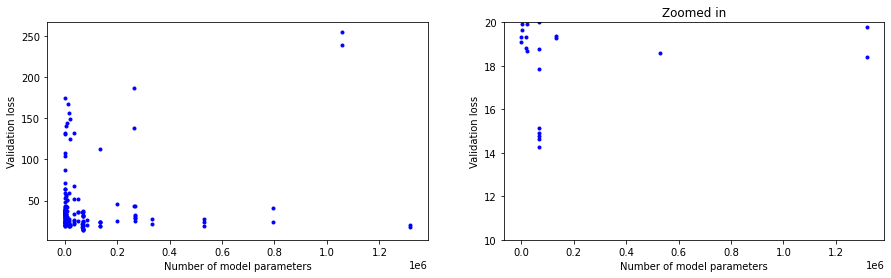

In [5]:
fig = plt.figure()
fig.set_figwidth(15)

ax = fig.add_subplot(1,2,1)
plt.figure(1, figsize = (8,8))
plt.xlabel('Number of model parameters')
plt.ylabel('Validation loss')
plt.plot(model_parameters, objective, 'b.')

ax = fig.add_subplot(1,2,2)
plt.figure(1, figsize = (8,5))
plt.title('Zoomed in')
plt.xlabel('Number of model parameters')
plt.ylabel('Validation loss')
plt.ylim([10,20])
plt.plot(model_parameters, objective, 'b.')

### Best set of hyperparameters 

In [6]:
which_file = 0
best_index = np.argsort(objective)[0]
for key in df.keys():
    which_file = which_file + df[key].shape[0]
    if which_file > best_index:
        print(df[key].iloc[df[key].shape[0]+best_index-which_file])
        print('\nDate and Optimizer: ' + key)
        break

Trial-ID                1
Status          COMPLETED
Iteration              74
activation_1         relu
activation_2         relu
activation_3          NaN
activation_4          NaN
activation_5          NaN
activation_6          NaN
activation_7          NaN
batch_size             32
bn_1                    0
bn_2                  0.0
bn_3                  NaN
bn_4                  NaN
bn_5                  NaN
bn_6                  NaN
bn_7                  NaN
epsilon               0.0
lrinit              0.001
model_depth             3
num_units             256
Objective       14.252577
Name: 0, dtype: object

Date and Optimizer: 2020-06-11_nadam


### More details on the model depth

In [7]:
model_parameters = {'2': [], '3': [], '4': [], '5': [], '6': [], '7': [], '8': []}
objective = {'2': [], '3': [], '4': [], '5': [], '6': [], '7': [], '8': []}

for key in df:
    for k in range(df[key].shape[0]):
        d = df[key].at[k, 'model_depth']
        u = df[key].at[k, 'num_units']
        # d-1 is the number of hidden layers, 10*u + 1 is the number of input and output weights & biases
        model_parameters['%d' % d].append(10*u + 1 + (d-2)*(u**2 + u))
        objective['%d' % d].append(df[key].at[k, 'Objective'])

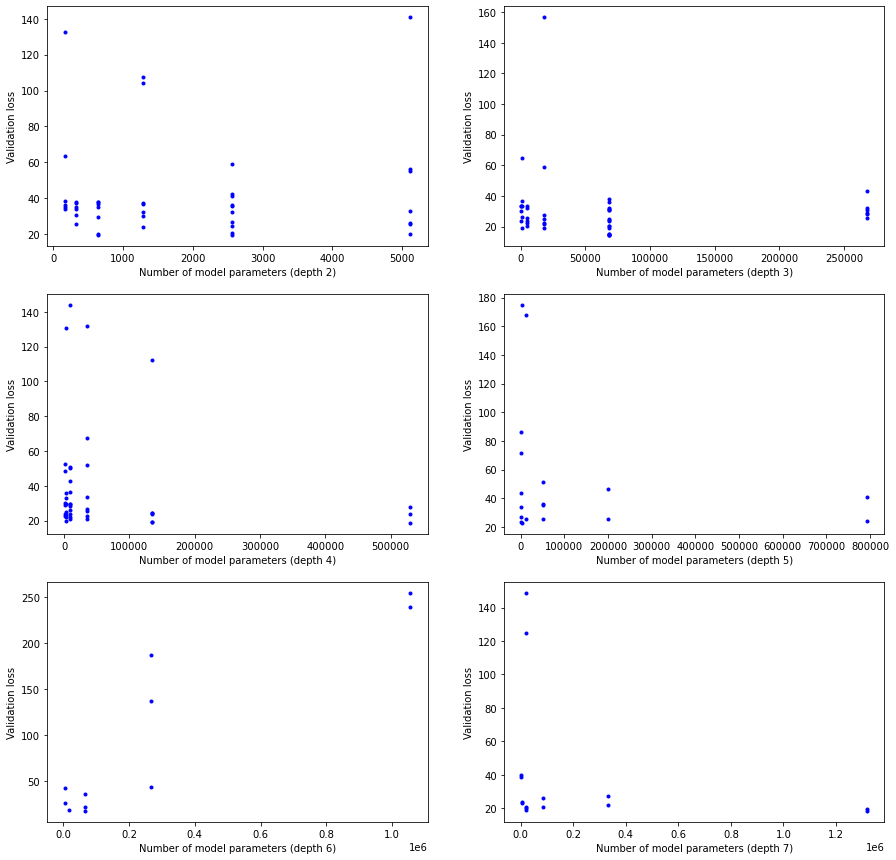

In [8]:
fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(15)

ax = fig.add_subplot(3,2,1)
plt.figure(1, figsize = (8,5))
plt.xlabel('Number of model parameters (depth 2)')
plt.ylabel('Validation loss')
plt.plot(model_parameters['2'], objective['2'], 'b.')

ax = fig.add_subplot(3,2,2)
plt.figure(1, figsize = (8,5))
plt.xlabel('Number of model parameters (depth 3)')
plt.ylabel('Validation loss')
plt.plot(model_parameters['3'], objective['3'], 'b.')

ax = fig.add_subplot(3,2,3)
plt.figure(1, figsize = (8,5))
plt.xlabel('Number of model parameters (depth 4)')
plt.ylabel('Validation loss')
plt.plot(model_parameters['4'], objective['4'], 'b.')

ax = fig.add_subplot(3,2,4)
plt.figure(1, figsize = (8,5))
plt.xlabel('Number of model parameters (depth 5)')
plt.ylabel('Validation loss')
plt.plot(model_parameters['5'], objective['5'], 'b.')

ax = fig.add_subplot(3,2,5)
plt.figure(1, figsize = (8,5))
plt.xlabel('Number of model parameters (depth 6)')
plt.ylabel('Validation loss')
plt.plot(model_parameters['6'], objective['6'], 'b.')

ax = fig.add_subplot(3,2,6)
plt.figure(1, figsize = (8,5))
plt.xlabel('Number of model parameters (depth 7)')
plt.ylabel('Validation loss')
plt.plot(model_parameters['7'], objective['7'], 'b.')

### Do a linear correlation analysis with validation loss

In [9]:
df_complete = pd.DataFrame(columns=df['2020-06-03_RMSprop'].columns)
for key in df.keys():
    df_complete = df_complete.append(df[key], ignore_index=True) 
    
# corr_matrix = df_complete.corr()
# print(corr_matrix['Objective'].sort_values(ascending=False))

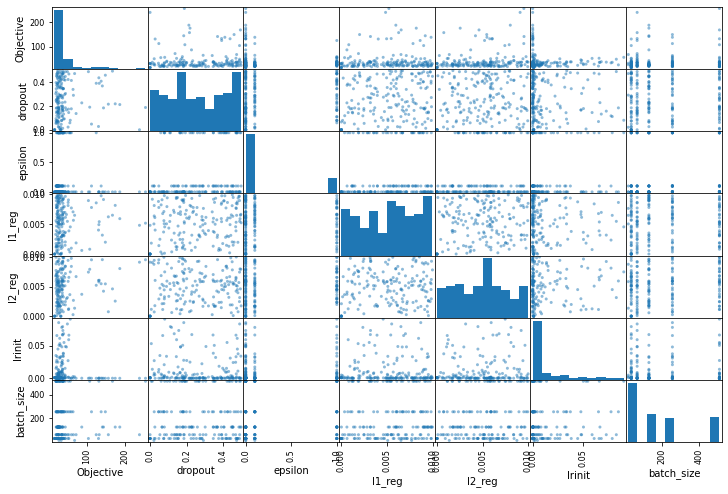

In [10]:
attributes = ['Objective', 'dropout', 'epsilon', 'l1_reg', 'l2_reg', 'lrinit', 'batch_size']
pd.plotting.scatter_matrix(df_complete[attributes].astype(np.float), figsize=(12,8));

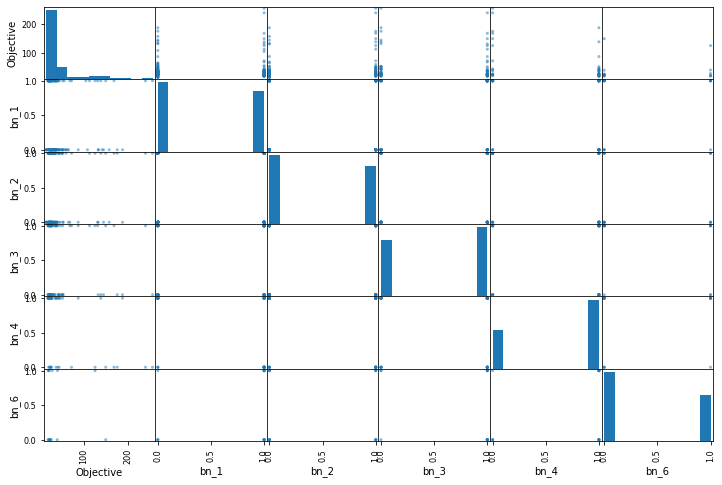

In [11]:
# Batch-Normalization
attributes = ['Objective', 'bn_1', 'bn_2', 'bn_3', 'bn_4', 'bn_6']
pd.plotting.scatter_matrix(df_complete[attributes].astype(np.float), figsize=(12,8));

### What about the activation functions?

In [12]:
print(np.min((df_complete.loc[df_complete['activation_1']=='relu'])['Objective']))
print(np.mean((df_complete.loc[df_complete['activation_1']=='relu'])['Objective']))
print(np.max((df_complete.loc[df_complete['activation_1']=='relu'])['Objective']))

14.252577064410854
36.53660236428395
156.66721145829396


In [13]:
print(np.min((df_complete.loc[df_complete['activation_1']=='elu'])['Objective']))
print(np.mean((df_complete.loc[df_complete['activation_1']=='elu'])['Objective']))
print(np.max((df_complete.loc[df_complete['activation_1']=='elu'])['Objective']))

18.787658963528987
38.68768291570536
186.88648239643595


In [14]:
print(np.min((df_complete.loc[df_complete['activation_1']=='tanh'])['Objective']))
print(np.mean((df_complete.loc[df_complete['activation_1']=='tanh'])['Objective']))
print(np.max((df_complete.loc[df_complete['activation_1']=='tanh'])['Objective']))

22.22729176303443
42.436493755215274
137.7037698930719


What about lrelu and leaky_relu?

In [15]:
def find_leaky_relu(dataframe):
    b_array = []
    for j in range(0, len(dataframe['activation_1'][:])):
        b_array.append(dataframe.at[j, 'activation_1'].find('leaky_relu') >= 0)
    return b_array

def find_lrelu(dataframe):
    b_array = []
    for j in range(0, len(dataframe['activation_1'][:])):
        b_array.append(dataframe.at[j, 'activation_1'].find('lrelu') >= 0)
    return b_array

In [16]:
print(np.min((df_complete.loc[find_leaky_relu(df_complete)])['Objective']))
print(np.mean((df_complete.loc[find_leaky_relu(df_complete)])['Objective']))
print(np.max((df_complete.loc[find_leaky_relu(df_complete)])['Objective']))

18.39345077351173
49.39020824452618
238.8245808838976


In [17]:
print(np.min((df_complete.loc[find_lrelu(df_complete)])['Objective']))
print(np.mean((df_complete.loc[find_lrelu(df_complete)])['Objective']))
print(np.max((df_complete.loc[find_lrelu(df_complete)])['Objective']))

17.8564489286917
48.91419531120555
254.69773443433
